In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hapinessreport.csv')

# EDA 

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Country and Happiness Rank column dosent seem to be of importance

In [4]:
df.shape

(158, 12)

Dataframe has 158 rows and 12 columns

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

All the columns have numerical data except for Country and Region column

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Our dataset has no missing values

In [7]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Only Region seems to be a Discrete variable, all other are Continuous

In [8]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Region column has the following categories

In [9]:
print('Percentage of Cardinality in Region Column')
print((df['Region'].value_counts()/df['Region'].value_counts().sum())*100)

Percentage of Cardinality in Region Column
Sub-Saharan Africa                 25.316456
Central and Eastern Europe         18.354430
Latin America and Caribbean        13.924051
Western Europe                     13.291139
Middle East and Northern Africa    12.658228
Southeastern Asia                   5.696203
Southern Asia                       4.430380
Eastern Asia                        3.797468
Australia and New Zealand           1.265823
North America                       1.265823
Name: Region, dtype: float64


'Sub-Saharan Africa' and 'Central and Eastern Europe' region are frequently occuring while 'Australia and New Zealand' and 'North America' regions occur rarely. 

In [10]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity show skewness which is need to be dealt with.

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Since count of each value is 158, therefore no missing values.
Data is symmetrically or normally distributed since mean and median are close to each other in all the columns.
Each column has variance close to zero except for Happiness rank and Happiness score column.
There seem to be very few or no outliers present as there not much difference in the interquartile ranges.

## Univariate Analysis

Text(0.5, 1.0, 'Cardinality of Region column')

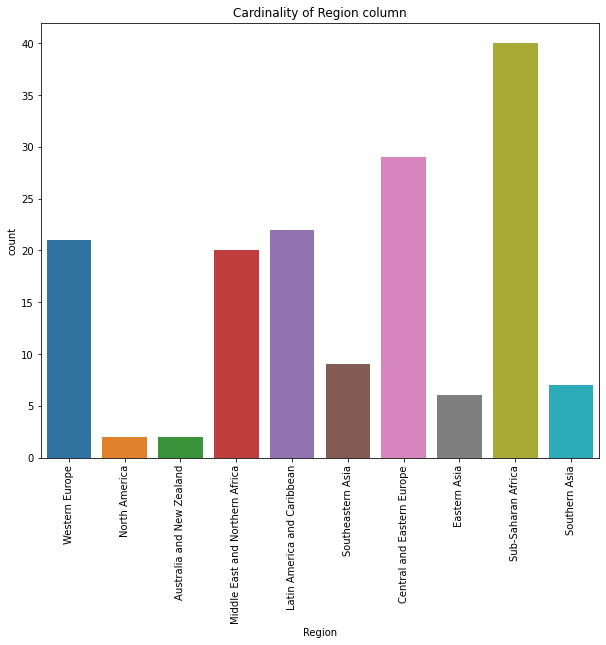

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.title('Cardinality of Region column')

Here we can see that Region columns have imbalanced categories

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
numeric_features=['Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
print(len(numeric_features))

9


Here we segregate columns having numerical values to plot various graphs

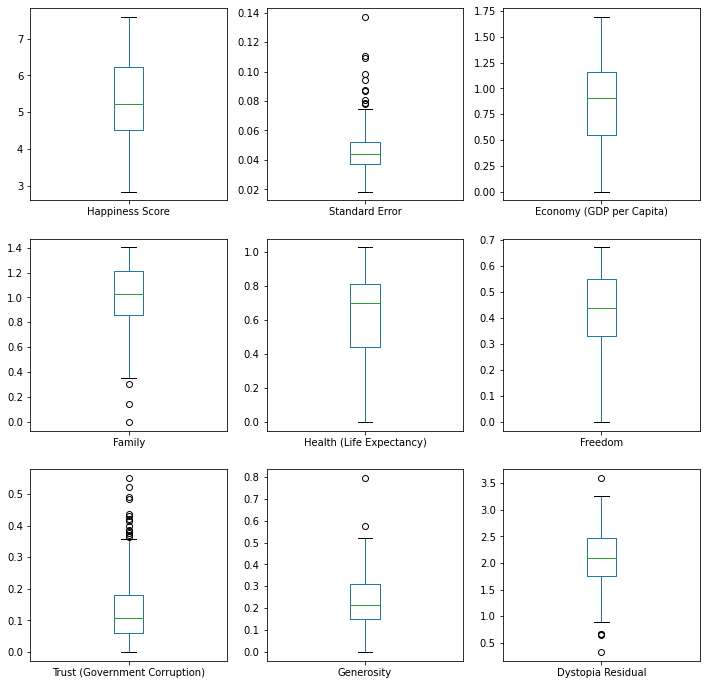

In [15]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

From above boxplots we can conclude that there are outliers in Standard Error and Trust (Government Corruption) feature whereas very few in Generosity and Dystopia Residual features

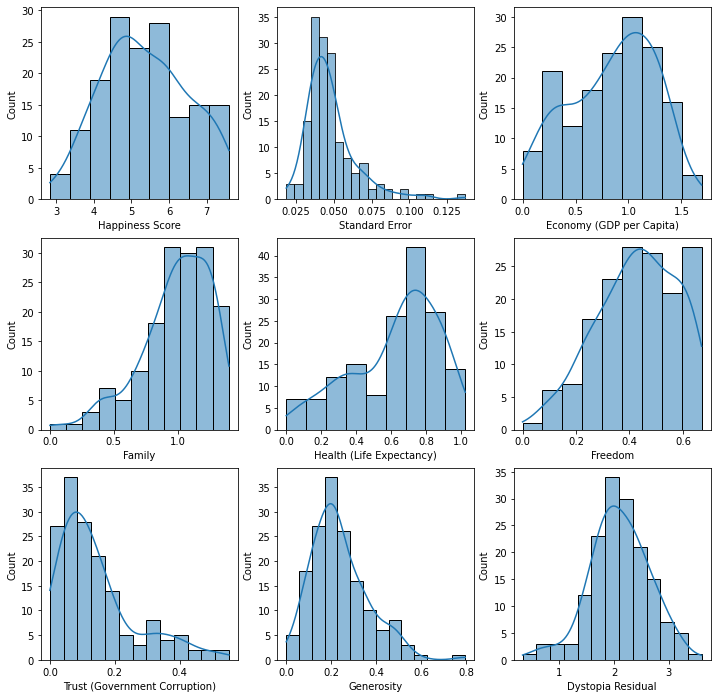

In [16]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

From above histograms we can conclude that Dytopia Residual feature is normally distributed and all other a little bit right skewed or left skewed

## Bivariate Analysis

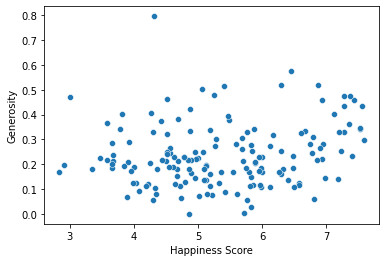

In [17]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)

In the above scatterplot we find no correlation between Generosity and Happiness Score

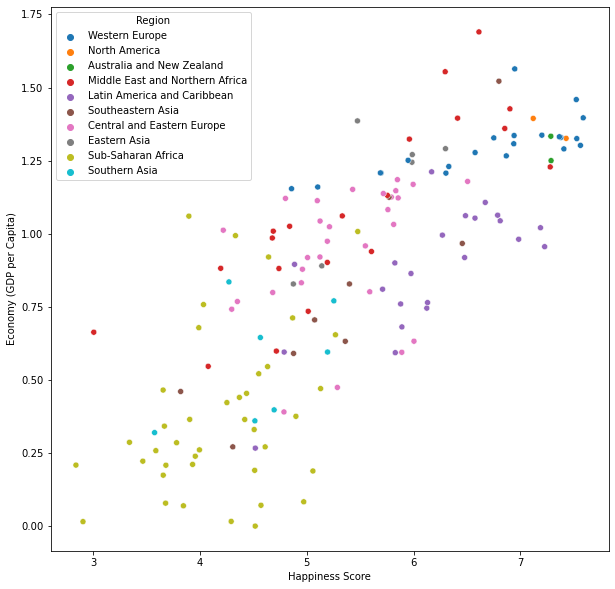

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df,hue='Region')

The above scatter plot shows that there is a positive correlation between Happiness Score and Economy (GDP per Capita) i.e. as the Economy of a country increases, Happiness score of that country also increases

<Figure size 720x720 with 0 Axes>

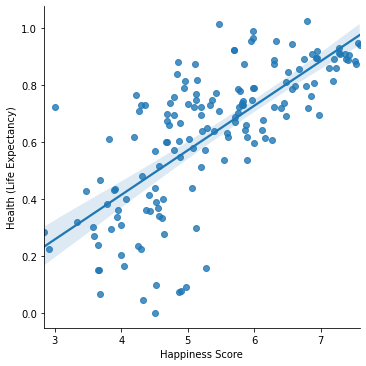

In [19]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

There is a positive correlation between Health of people and Happiness Score but there are outliers also present

## Multivariate Analysis

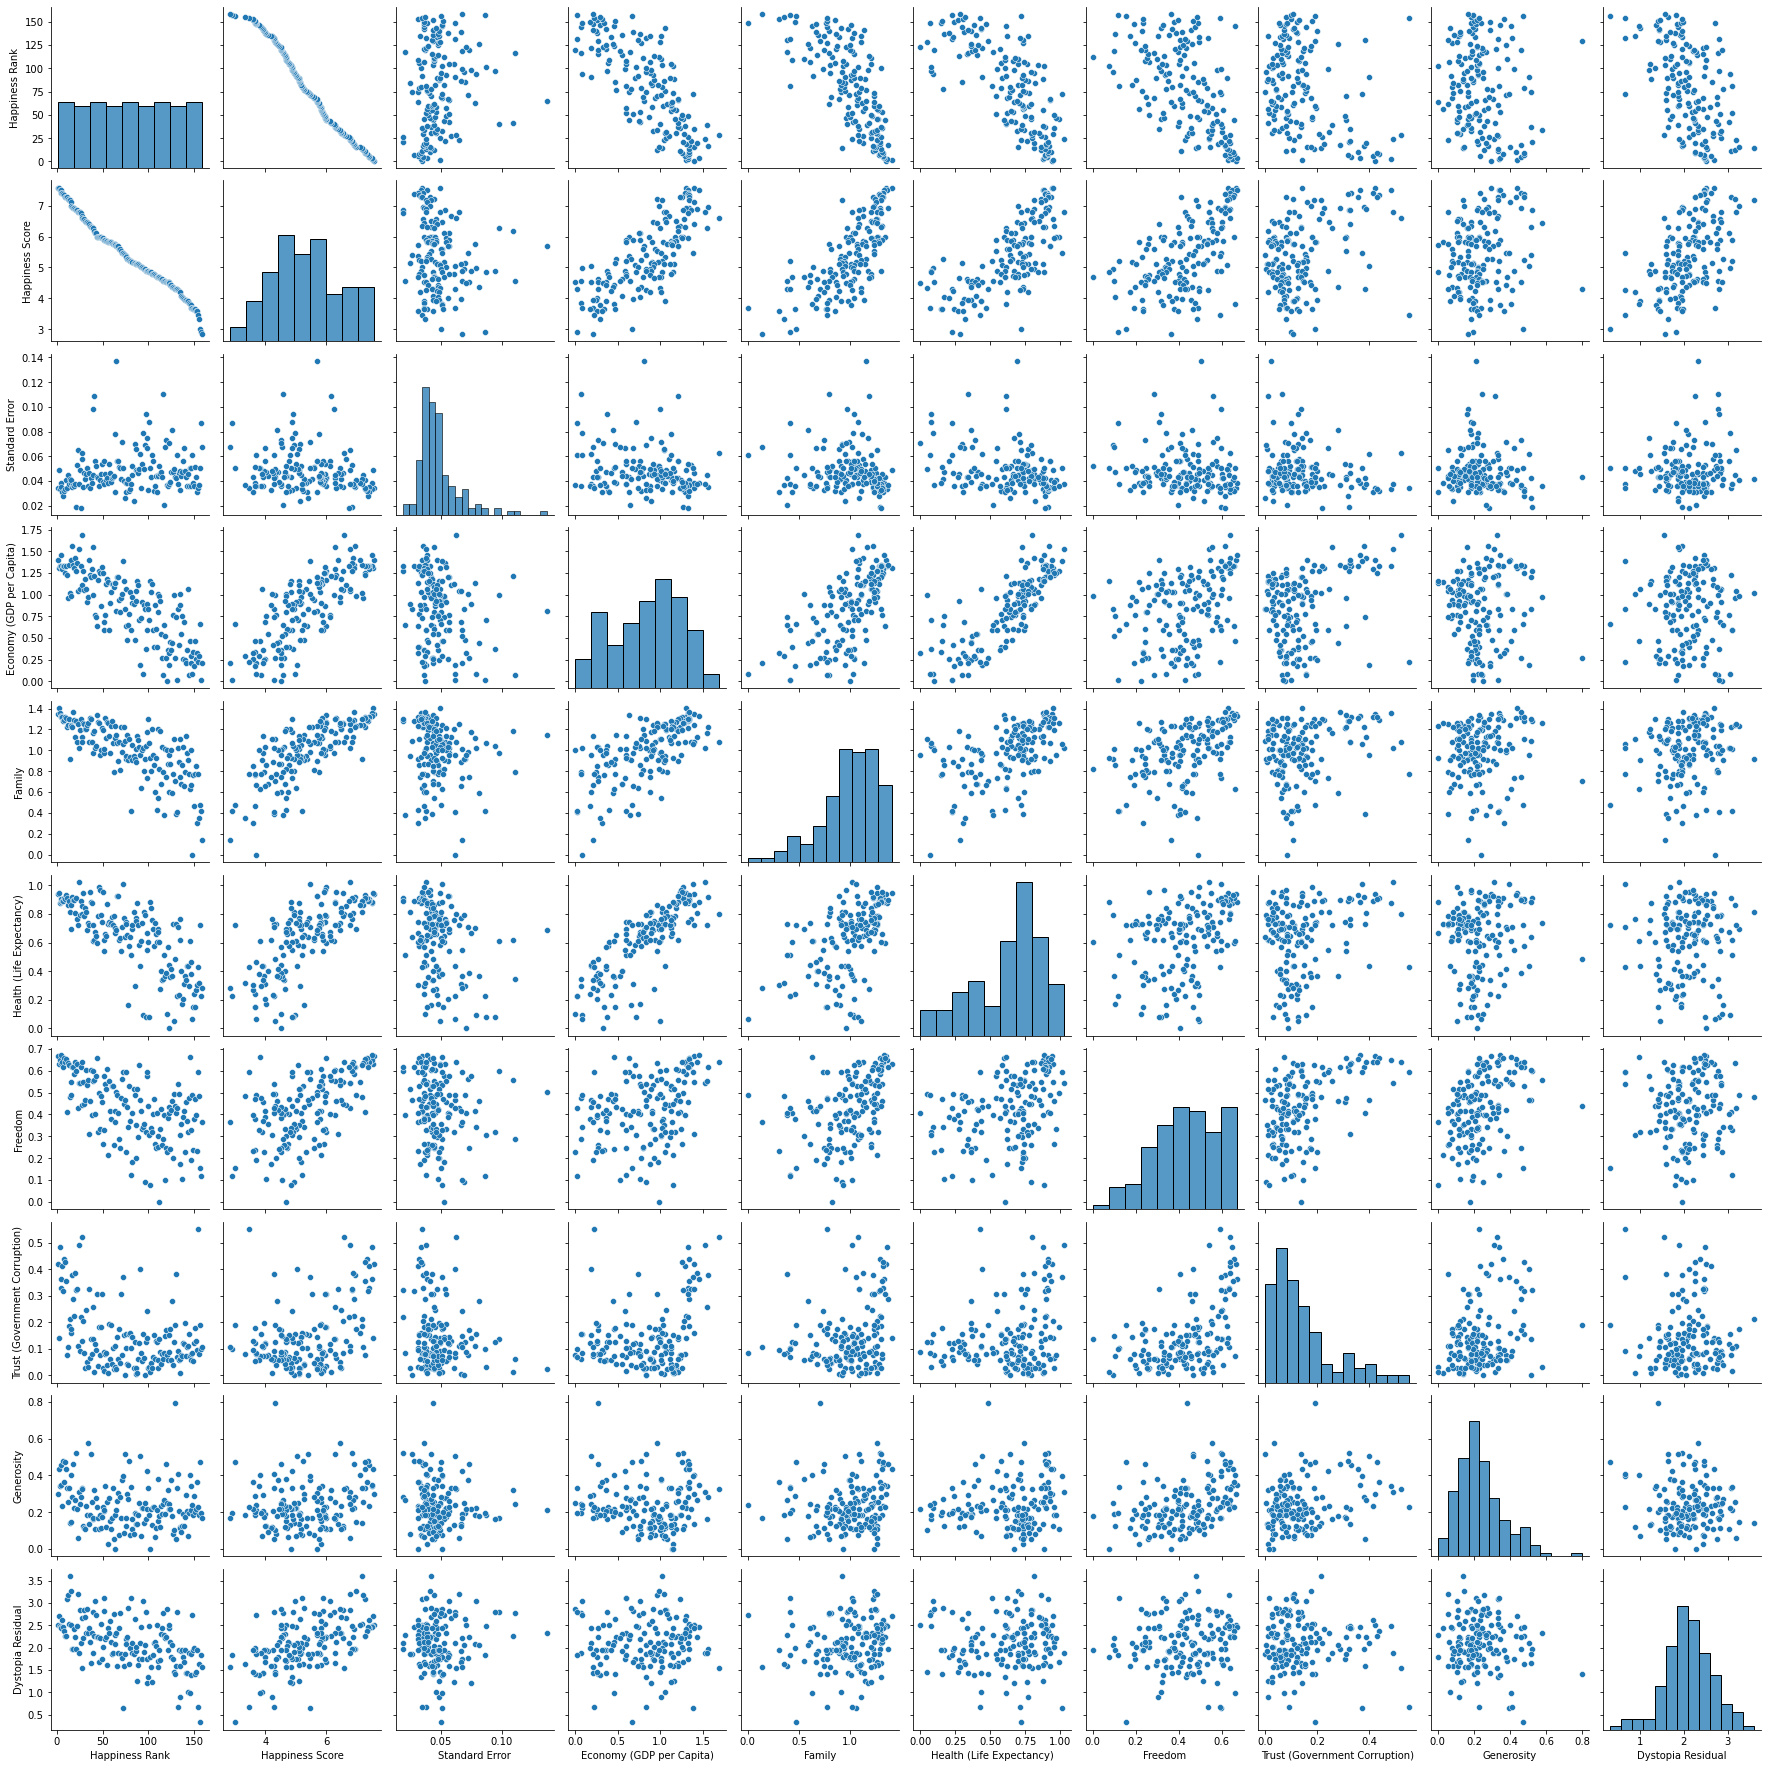

In [20]:
sns.pairplot(df)

Above Pairplot show that our target feature(Happiness Score) shows positive linear correlation with almost all features except for a few which show no correlation and a negative correlation with happiness rank 

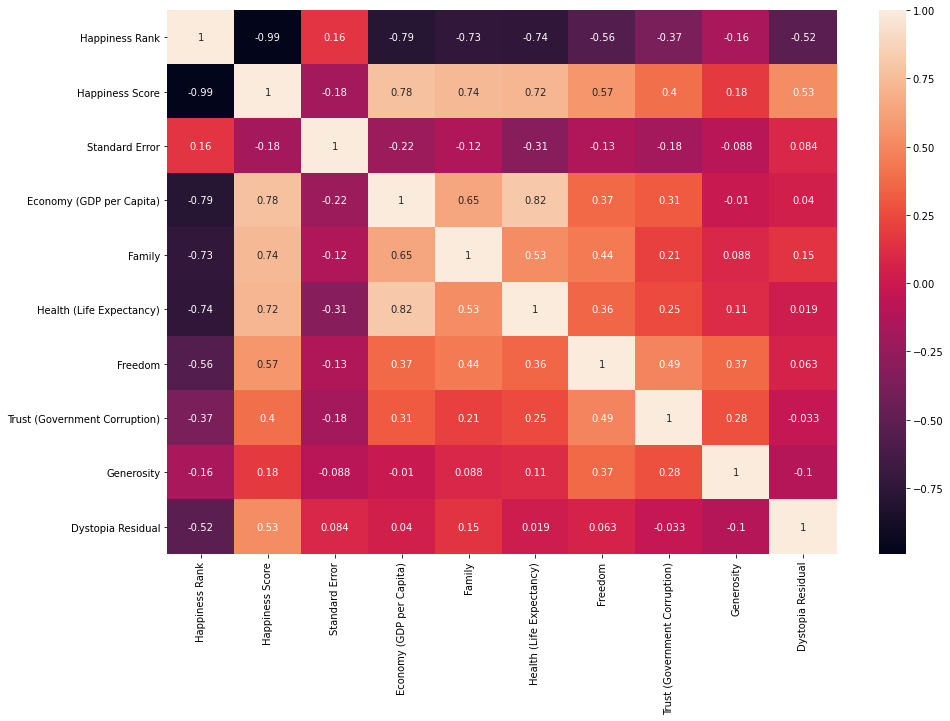

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Happiness Score show a strong correlation between Economy,Family,Health and Dystopia while a negative correlation with Happiness Rank

# Feature Engineering 

In [22]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
print(df.shape)
df.drop(['Country','Happiness Rank'],axis=1,inplace=True)
df.shape

(158, 12)


(158, 10)

In [24]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

importing Label Encoder and creationg an instance of it

In [25]:
df['Region']=e.fit_transform(df['Region'])
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We converted column Region from Object to int type

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

Removing Outliers present in the dataset by zscore

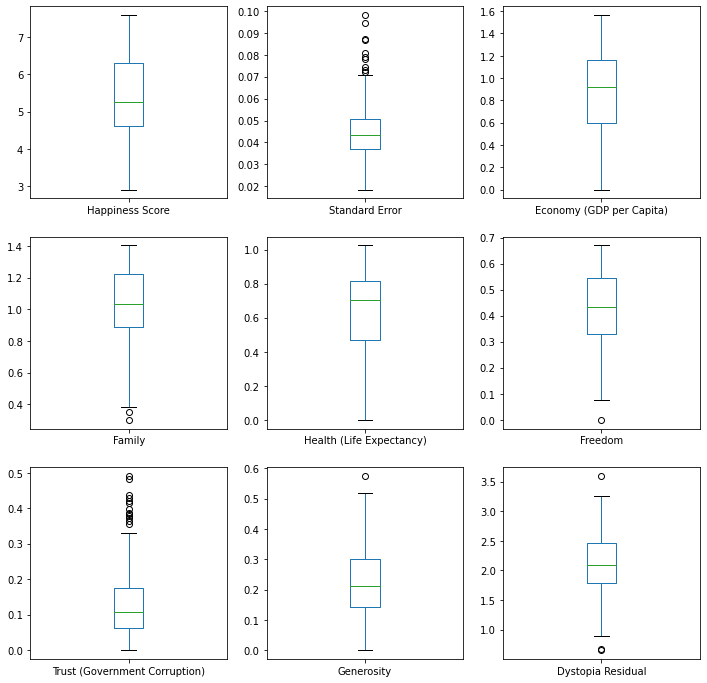

In [27]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

Even after removing outliers, there are some present.

In [28]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

After Removing Outliers, Skewness is also reduced but not completely

In [29]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

Since negative skewness is present i.e. data is left skewed we cannot use log transformation. Hence we use Power Transformer

In [31]:
df.skew()

Region                          -0.222589
Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

Now all the skew values are between -0.5 to +0.5

In [32]:
y=df['Happiness Score']
x=df.copy()
x.drop('Happiness Score',axis=1,inplace=True)

We separate are Dependent and Independet Features

In [33]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()

Even though there not much need of scaling still there is a big difference between Standard Error and Dystopia features hence we scale the values

In [34]:
xs=s.fit_transform(x)
x=pd.DataFrame(xs,columns=x.columns)
x.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.000000,0.380243,0.862295,0.914502,0.858145,0.991316,0.961753,0.669075,0.625344
1,1.000000,0.621320,0.787868,1.000000,0.868527,0.915949,0.585246,0.856886,0.688668
2,1.000000,0.363723,0.805963,0.932054,0.754423,0.957838,0.996109,0.735139,0.616669
3,1.000000,0.467178,0.912891,0.885542,0.770304,1.000000,0.922971,0.742999,0.607522
4,0.623159,0.407692,0.806598,0.872719,0.801548,0.924420,0.891819,0.881749,0.602887


Since there are only 9 columns we donot perform PCA

NOTE - For now I am not performing Feature Selection as the no. of features are already very low. I will perform this step if our model accuracy is low

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

In [39]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [40]:
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 0.34782900729924754
Mean squared error 0.21623706472090848
Root Mean squared error 0.4650129726372249
R2 Score 0.7370379525856956
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.19826021684910167
Mean squared error 0.10970604064951897
Root Mean squared error 0.33121902217342375
R2 Score 0.8665884357052829
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.36673565892958493
Mean squared error 0.2156295414732919
Root Mean squared error 0.4643592805934774
R2 Score 0.7377767507989031
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.08435564989614346
Mean squared error 0.01878432396700038
Root Mean squared error 0.13705591547613105
R2 Score 0.9771567178086172
----------

In [41]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  LinearRegression() 0.08435564989614346
Minimum Mean squared error is shown by  LinearRegression() 0.01878432396700038
Minimum Root Mean squared error is shown by  LinearRegression() 0.13705591547613105
Maximun R2 Score is shown by  LinearRegression() 0.9771567178086172


In [42]:
from sklearn.model_selection import GridSearchCV

### We try to perform hyperparameter tuning on ridge since it is also performing well

In [43]:
ridge=Ridge()
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m=GridSearchCV(ridge,param_grid,cv=10)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)


Mean absolute error 0.08435564989614376
Mean squared error 0.01878432396700034
Root Mean squared error 0.1370559154761309
R2 Score 0.9771567178086173


Ridge regression even after Hypertuning gives same result as Linear Regression model

### Hypertuning Adaboost classifier using base learner as Linear regression model

In [44]:
param={'n_estimators':[50, 100, 150, 200, 250, 300],'learning_rate':[0.0001,0.001,0.01,.1,1,2,5,10]}
m=GridSearchCV(AdaBoostRegressor(base_estimator=LinearRegression()),param,cv=10,n_jobs=-2)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.08354144848534763
Mean squared error 0.01849138546861062
Root Mean squared error 0.13598303375278337
R2 Score 0.9775129551049497


It is also giving the same result as a single Linear Regression model

### Hypertuning SVR model as its default kernel values is rbf maybe by changing it to linear may give us good result as Linear regression model is performing well

In [45]:
param_grid={'C':[1,20,40,60,80,100,200,300,500,1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVR(),param_grid)
grid.fit(xtrain,ytrain)
p=grid.predict(xtest)

In [46]:
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.08803037287245384
Mean squared error 0.020506747370334175
Root Mean squared error 0.14320177153350505
R2 Score 0.9750621093508139


Still not better than Linear Regression model

#### Now we see if our model can perform better if we drop Region feature from our dataset

In [47]:
x_new=x.drop('Region',axis=1)
x_new.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.380243,0.862295,0.914502,0.858145,0.991316,0.961753,0.669075,0.625344
1,0.621320,0.787868,1.000000,0.868527,0.915949,0.585246,0.856886,0.688668
2,0.363723,0.805963,0.932054,0.754423,0.957838,0.996109,0.735139,0.616669
3,0.467178,0.912891,0.885542,0.770304,1.000000,0.922971,0.742999,0.607522
4,0.407692,0.806598,0.872719,0.801548,0.924420,0.891819,0.881749,0.602887


In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.25,random_state=7)

In [49]:
m=LinearRegression()
m.fit(xtrain,ytrain)
p=m.predict(xtest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.09409120099337456
Mean squared error 0.02175796074896472
Root Mean squared error 0.147505799035037
R2 Score 0.9735405310209309


The score seems to go down even with this. Therefore we find that our simple linear model is the best model with region column included

## Finally creating the best model

In [50]:
m=LinearRegression()
m.fit(x,y)

LinearRegression()

In [51]:
import joblib
joblib.dump(m,'Happinessmodel.obj')

['Happinessmodel.obj']